# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

### Step 3. Assign it to a variable titanic 

In [3]:
titanic = pd.read_csv(url)

In [10]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 4. Set PassengerId as the index 

In [6]:
titanic.set_index('PassengerId', drop=True, inplace=True)

In [7]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [21]:
m_f = titanic['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

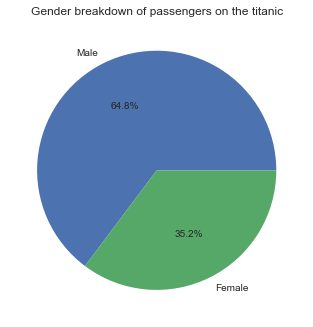

In [34]:

plt.pie(m_f,labels=['Male', 'Female'], autopct= '%1.1f%%' )
plt.title('Gender breakdown of passengers on the titanic')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

In [50]:
filt = titanic['Sex'] == 'male'
male_fares = titanic[filt].loc[:,['Age','Fare']]
female_fares = titanic[~filt].loc[:,['Age','Fare']]

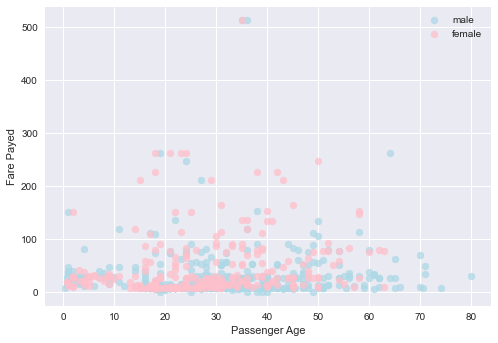

In [59]:
plt.scatter(
    male_fares['Age'],
    male_fares['Fare'],
    c = 'lightblue',
    alpha=0.75
)
plt.scatter(
    female_fares['Age'],
    female_fares['Fare'],
    c='pink',
    alpha=0.75
)
plt.xlabel('Passenger Age')
plt.ylabel('Fare Payed')
plt.legend(['male', 'female'])
plt.show()

### Step 7. How many people survived?

In [9]:
titanic['Survived'].sum()

342

### Step 8. Create a histogram with the Fare payed

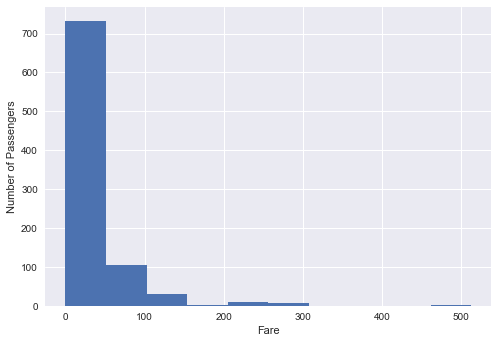

In [61]:
plt.hist(titanic['Fare'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

### BONUS: Create your own question and answer it.Find the proportion of survivors for each clas

In [103]:
class_survival = titanic.groupby('Pclass').mean()['Survived']
categories = [str(x) for x in class_survival.index] # need to strictly make the numbers strings, otherwise python infers the type and will use continuous numeric scale

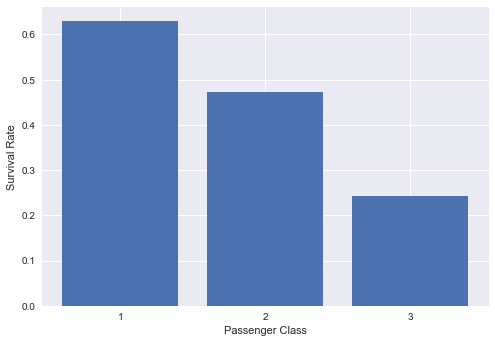

In [104]:
plt.bar(categories,class_survival)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [97]:
list(categories)

[1, 2, 3]